In [1]:
import matplotlib as plt                                 # Классические библиотеки
import pandas as pd
import numpy as np                                   

import io                                                # Библиотека для считывания из файла

from sklearn import random_projection                    # Метод случайных проекции
from sklearn.decomposition import RandomizedPCA          # PCA - Метод главных компонент
from sklearn.manifold import MDS                         # MDS
from sklearn.manifold import TSNE                        # t-SNE
from sklearn import utils

from PIL import Image                                    # Библиотека для обработки изображений

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Dimensionality reduction for images

Wellcome to Exploratory data analysis notebook. On this notebook we gonna to analyse collected data on "Dataset" folder. Let's gonna look to random image from our dataset

<img src="images/example.jpg", width=360, height=128>

All images has 180x64 resolution in pixels, with green channel only. This mean that images are located in 180 * 64 = 11520 dimensional space. If we will apply dimensionality reduction technics like:

<ul>
    <li>Random projection</li>
    <li>Principal component analysis</li>
    <li>Multidimensional scaling</li>
    <li>t-SNE</li>
</ul>
to images, we will get following results:

### Random projection

<img src="images/180x64  Random Projection.png">

### Principal component analysis

<img src="images/180x64  PCA.png">

### t-SNE

<img src="images/180x64  t-SNE.png">

Last 2 methods gives us images with similar pattern. So it's look like the classes can be separable by the nonlinear algorithm with good generalization. For example a neural networks. But creating a neural network with 11520 inputs is not effective way to use a computational resources, and hard to train. One way to solve this problem is to use feature extraction.  In our case we need to somehow compress data, without loss of useful information. If you look to our image again:

<img src="images/example.jpg", width=360, height=128>

you can find bright spot on the right side of image. And something like walls on each side of this bright spot. Each pixel on this image corresponds to each ray emitted by lidar. The brightness of pixel corresponds to distance measured by ray of lidar. The farther the distance, the brighter the pixel. Range of brightness is between from 0 to 255. In the case of this image, we need to move towards a bright spot. So, the logic of character control is next:

<ol>
    <li> turn right, until bright spot come to the center of image</li>
    <li> go forward and keep move to this spot</li>
</ol>

If you gonna to look control table shown below:

<table>
    <tr>
        <th>Label</th>
        <th>Command</th>
        <th>Button</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Forward</td>
        <td>Up Arrow</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Rightward</td>
        <td>Right Arrow</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Stopward</td>
        <td>Down Arrow</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Leftward</td>
        <td>Left Arrow</td>
    </tr>
</table>

you will see that control occurs in the horizontal plane. So it's mean that we can ignore the vertical part of the image, and focus only on horizontal part. By this assumption we will average all vertical columns, and get vector with 180x1 dimension, roughly similar to shown below:

<img src="images/reduced_example.jpg", width=360, height=128>

As you see the bright spot is still on the right side of the image. Let's do the same operation on all images from the "Dataset" folder, and look at their visualizations.

In [2]:
pathToImages = 'C:/Users/User/Desktop/Polygon/Dataset/'
dataTable = pd.read_csv(pathToImages + 'labels.csv', header = 0, index_col = None)
colorful = ['violet', 'yellow', 'blue', 'green']
movements = ['Forward', 'Right', 'Left', 'Stop']

train = []              # Обучающие данные
labels = []             # Метки

f = plt.Line2D(range(10), range(10), marker='o', color=colorful[0])
r = plt.Line2D(range(10), range(10), marker='o',color=colorful[1])
l = plt.Line2D(range(10), range(10), marker='o',color=colorful[2])
s = plt.Line2D(range(10), range(10), marker='o',color=colorful[3])

In [3]:
dataTable.head()

Image name  Direction
0   Lidar_2_16_2018 5_00_18 PM_66.jpg          1
1  Lidar_2_16_2018 5_00_18 PM_123.jpg          1
2  Lidar_2_16_2018 5_00_18 PM_184.jpg          1
3  Lidar_2_16_2018 5_00_18 PM_235.jpg          1
4  Lidar_2_16_2018 5_00_18 PM_284.jpg          1

### Data preprocessing

In [4]:
%%time
# Convert images with size 180x64 to vectors of length 180
for filename in dataTable['Image name']:
    imagePixels = []
    image = Image.open((pathToImages + 'images/' +  filename)) #Can be many different formats.
    pixels = list(image.getdata())
    for i in range(image.size[0]):
        imagePixels.append(np.mean(pixels[i::180]))
    train.append(imagePixels)
        
labels = list(dataTable['Direction'])

Wall time: 4min 54s


In [5]:
X, y = utils.shuffle(train, labels)

## Random Projection method

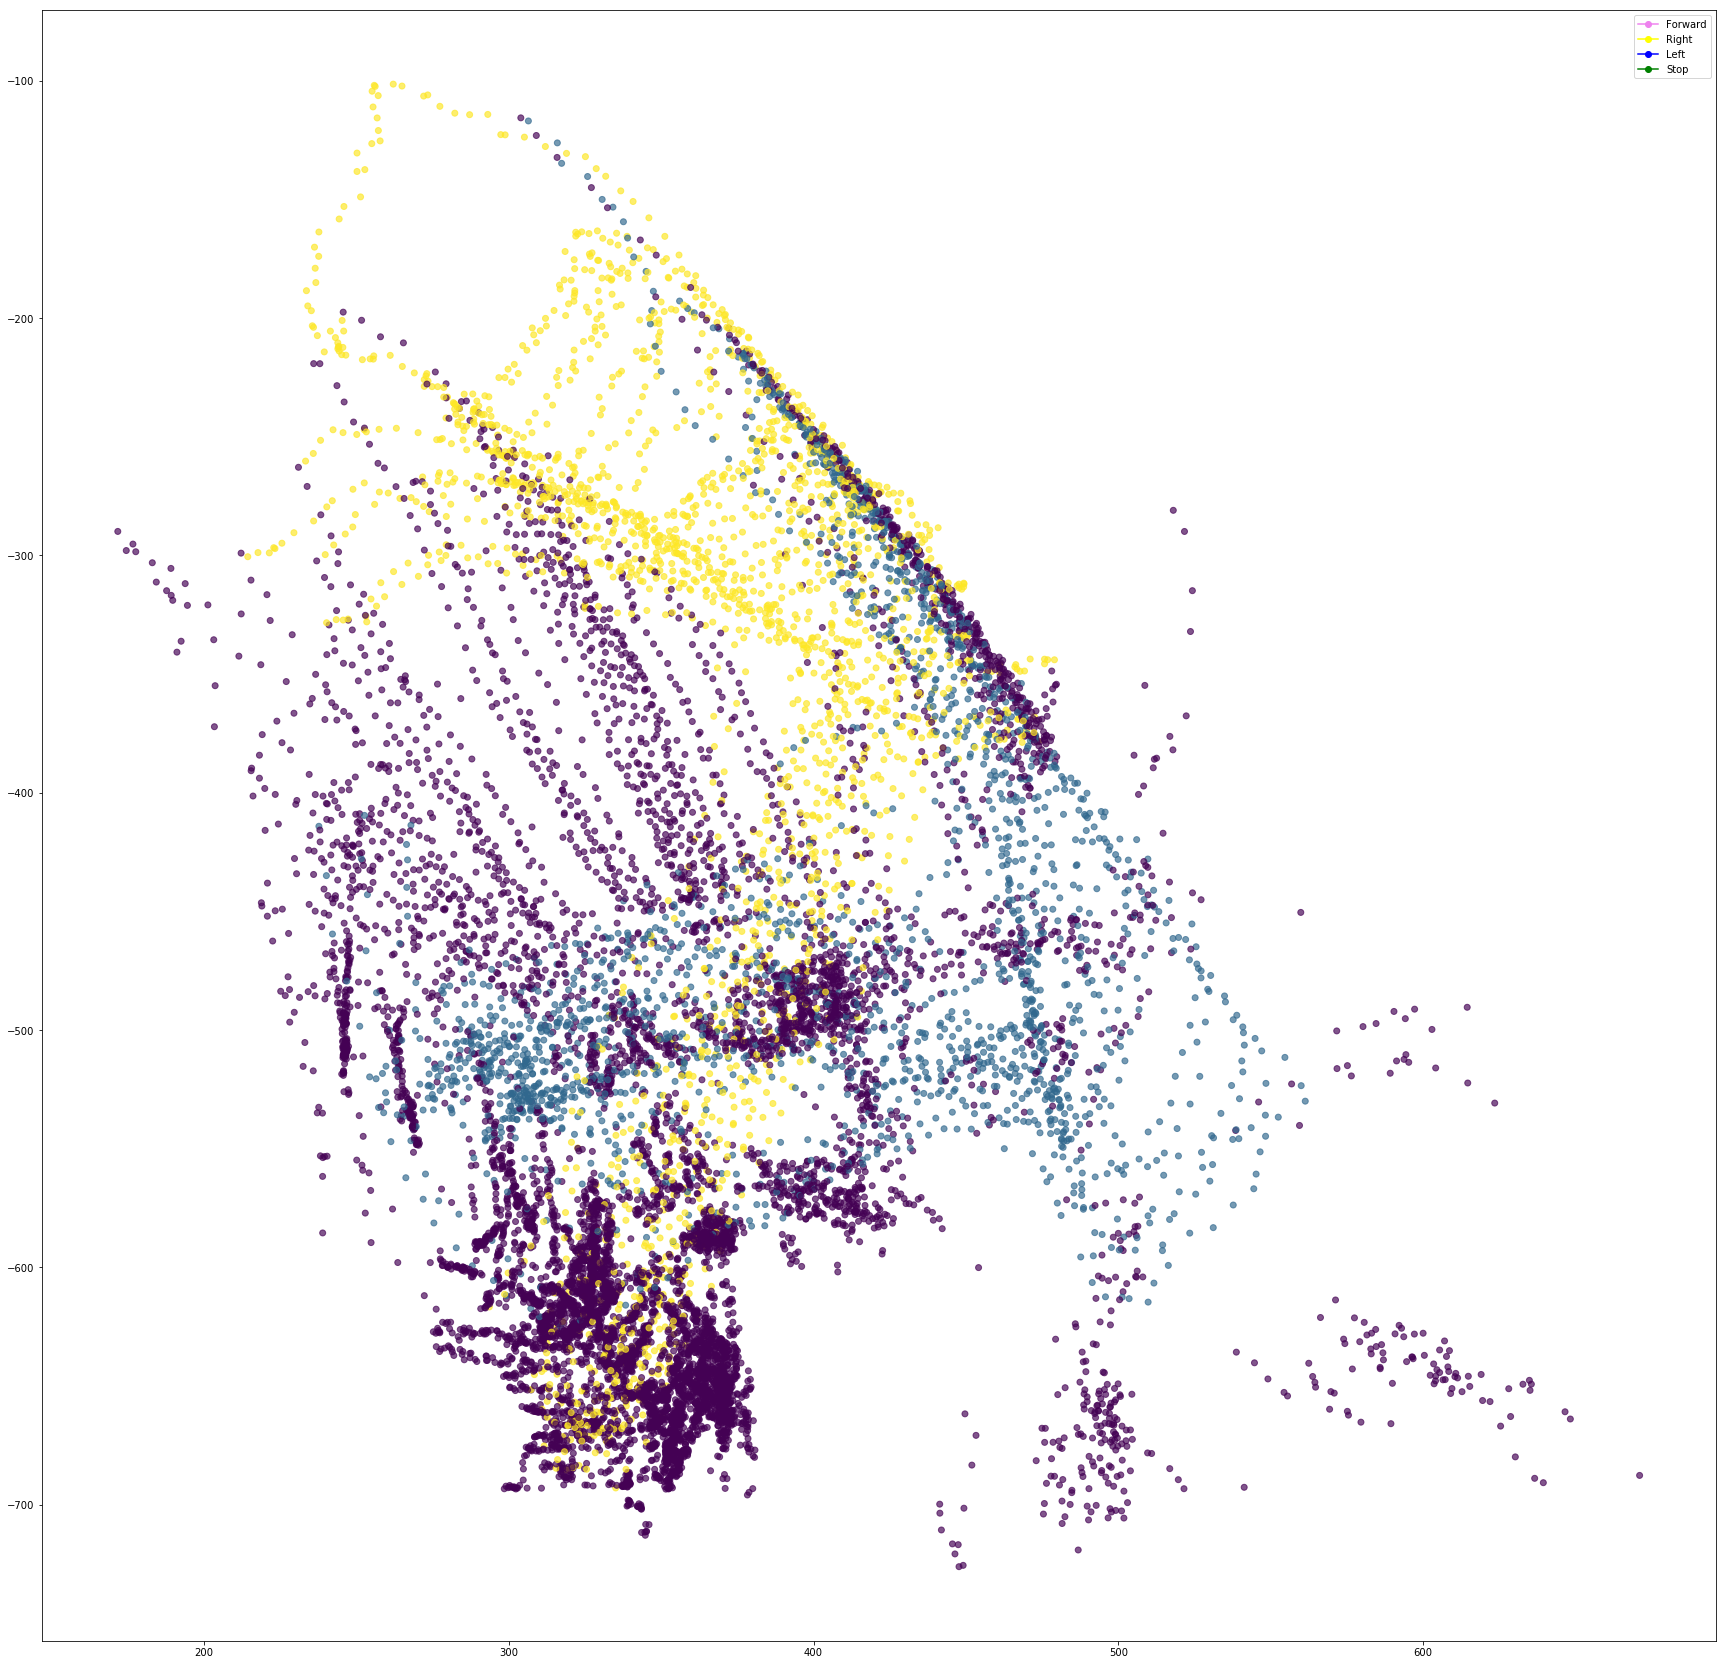

Wall time: 2.15 s


In [6]:
%%time
projection = random_projection.SparseRandomProjection(n_components = 2)
data_2d_rp = projection.fit_transform(X)

pylab.figure(figsize = (30, 30))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = y, alpha = 0.67)

pylab.legend((f, r, l, s),(movements),numpoints=1, loc=1)

pylab.show()

## Principal Component Analysis method (PCA)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


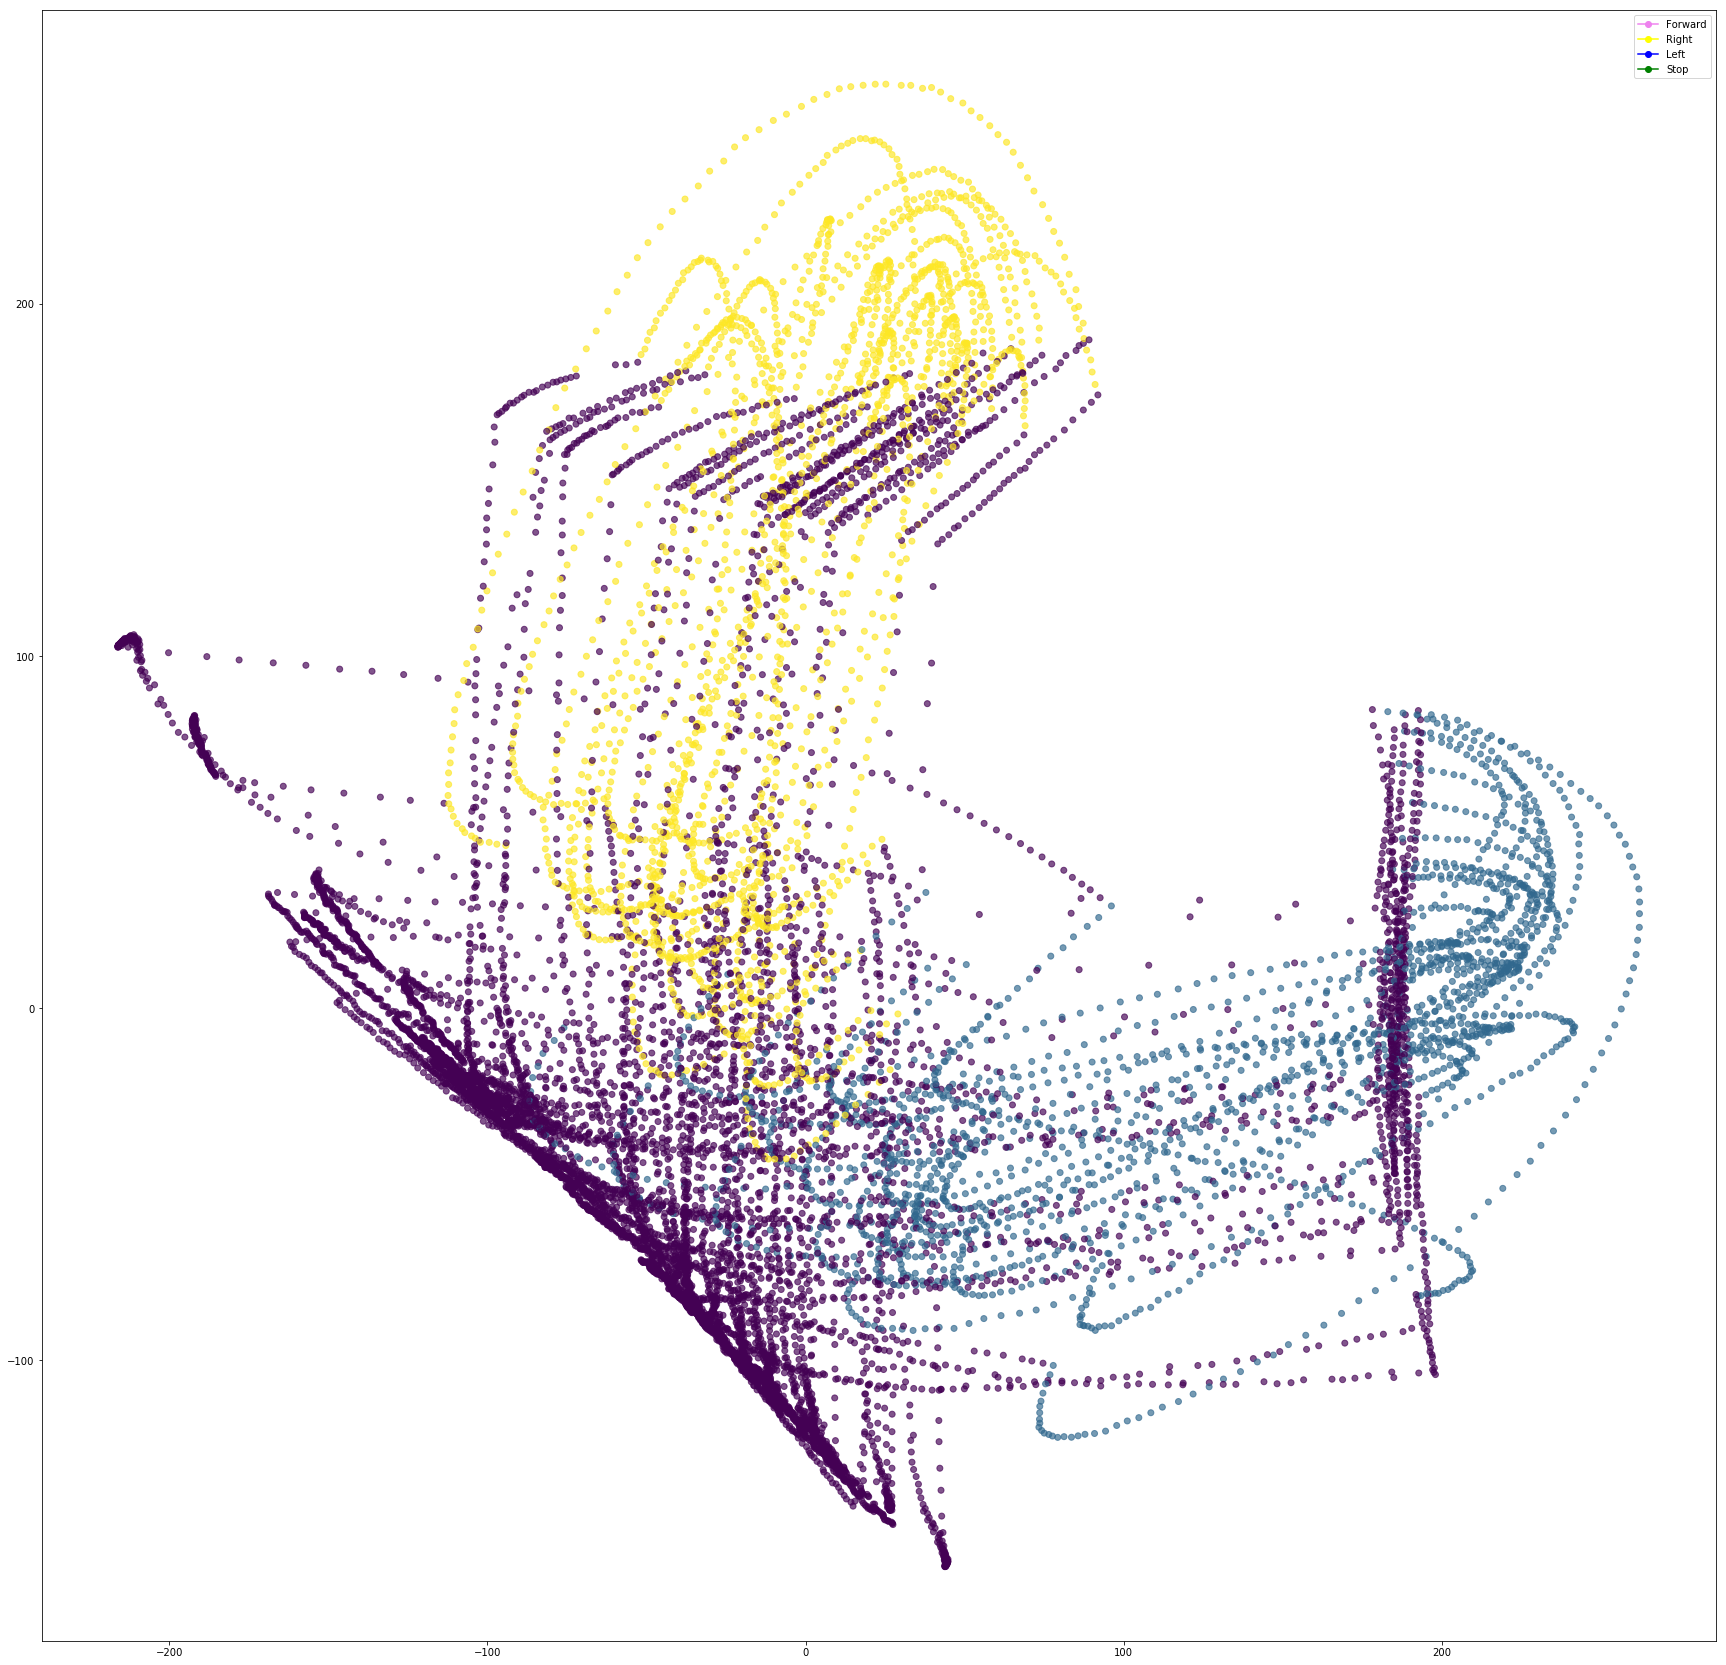

Wall time: 2.22 s


In [7]:
%%time
pca = RandomizedPCA(n_components = 2)
data_2d_pca = pca.fit_transform(X)

pylab.figure(figsize = (30, 30))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = y, alpha = 0.67)

pylab.legend((f, r, l, s),(movements),numpoints=1, loc=1)

pylab.show()

## t-SNE method

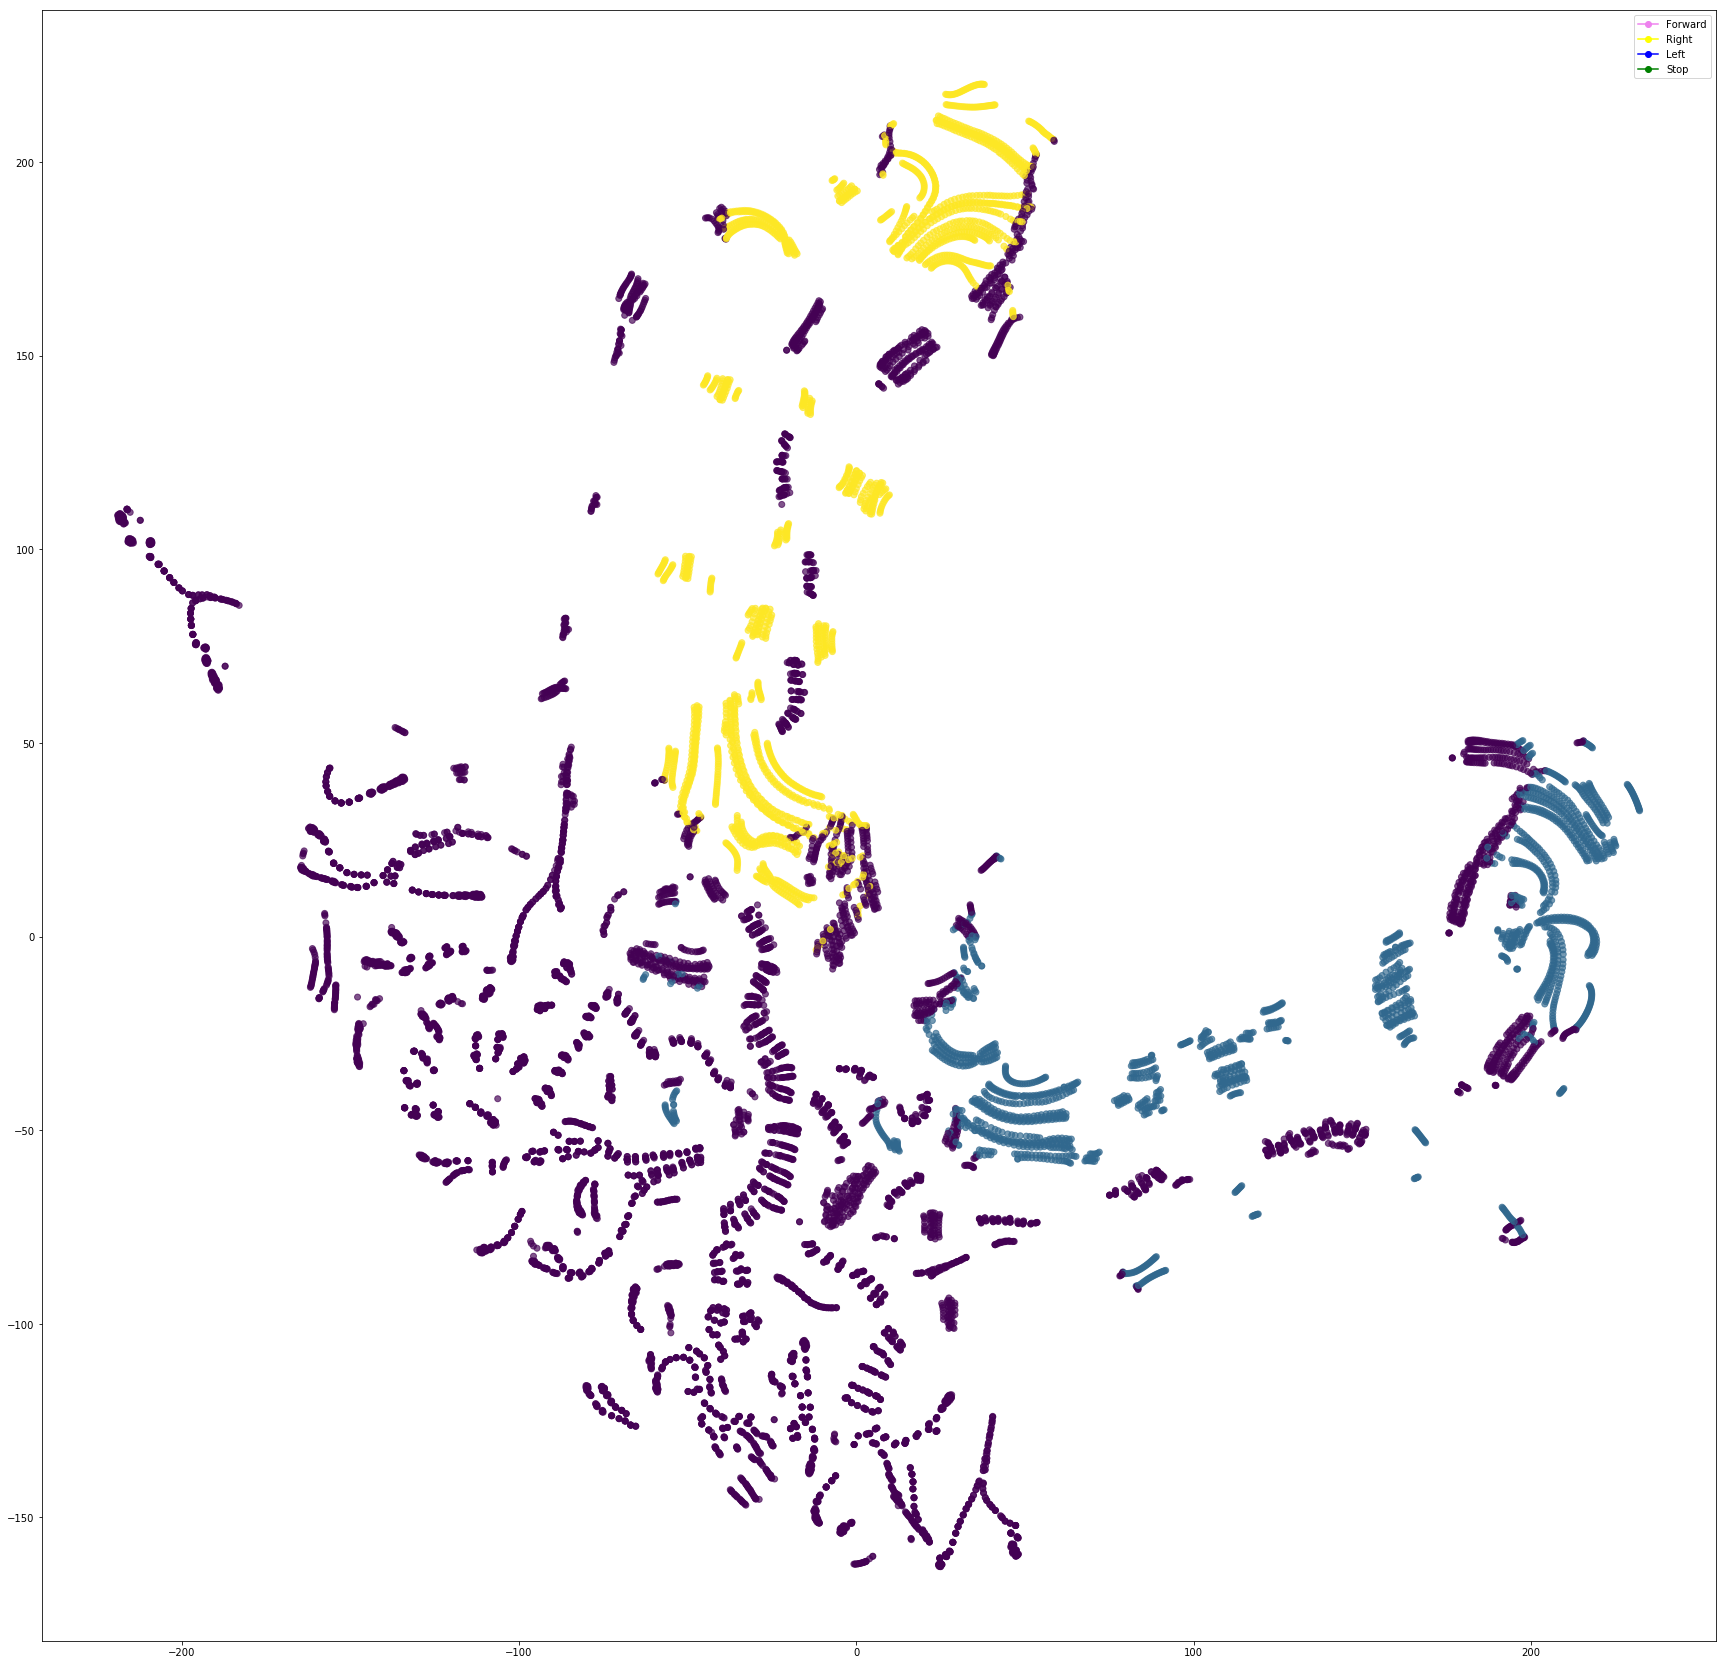

Wall time: 7min 20s


In [8]:
%%time
tsne = TSNE(n_components = 2, init = 'pca')
data_2d_tsne = tsne.fit_transform(X)

pylab.figure(figsize = (30, 30))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = y, alpha = 0.67)

pylab.legend((f, r, l, s),(movements),numpoints=1, loc=1)

pylab.show()

As you see we get approximatly same patterns.This should mean that we saved the most important part of information. 

# Data augmentation

If you take a look at visualizations carefully, you will find that there is present some asymmetry. This circumstance can be a reason of model's inadequate behavior. For example if we turn to "Left" in same conditions and turn to "Right" in different, when we collect data, this cause some uncertainty in model control, even if we keep in balance the classes proportion. Because there is some imbalance in data content. One way to solve this problem is to generate more data to increase model generalization ability. The steps to do it are shown below:
1. Copy the image
2. Inverse it vertically
3. If label of image is "Rightward" change it to "Leftward", otherwise do the opposite. If the labels are "Forward" or "Stopward" don't change it.

<img src="images/da_right_example.png", width=360, height=128>

Or

<img src="images/da_forward_example.png", width=360, height=128>

Now let's do the same operation to all data and look at it's visualization using t-SNE method (it can take several minutes):

In [6]:
# Synthesizing data: vertical inverting of images
for i in range(len(dataTable['Direction'])):
    train.append(train[i][::-1])
    if labels[i] == 2:
        labels.append(4)
    elif labels[i] == 4:
        labels.append(2)
    else:
        labels.append(1)
        
X, y = utils.shuffle(train, labels)

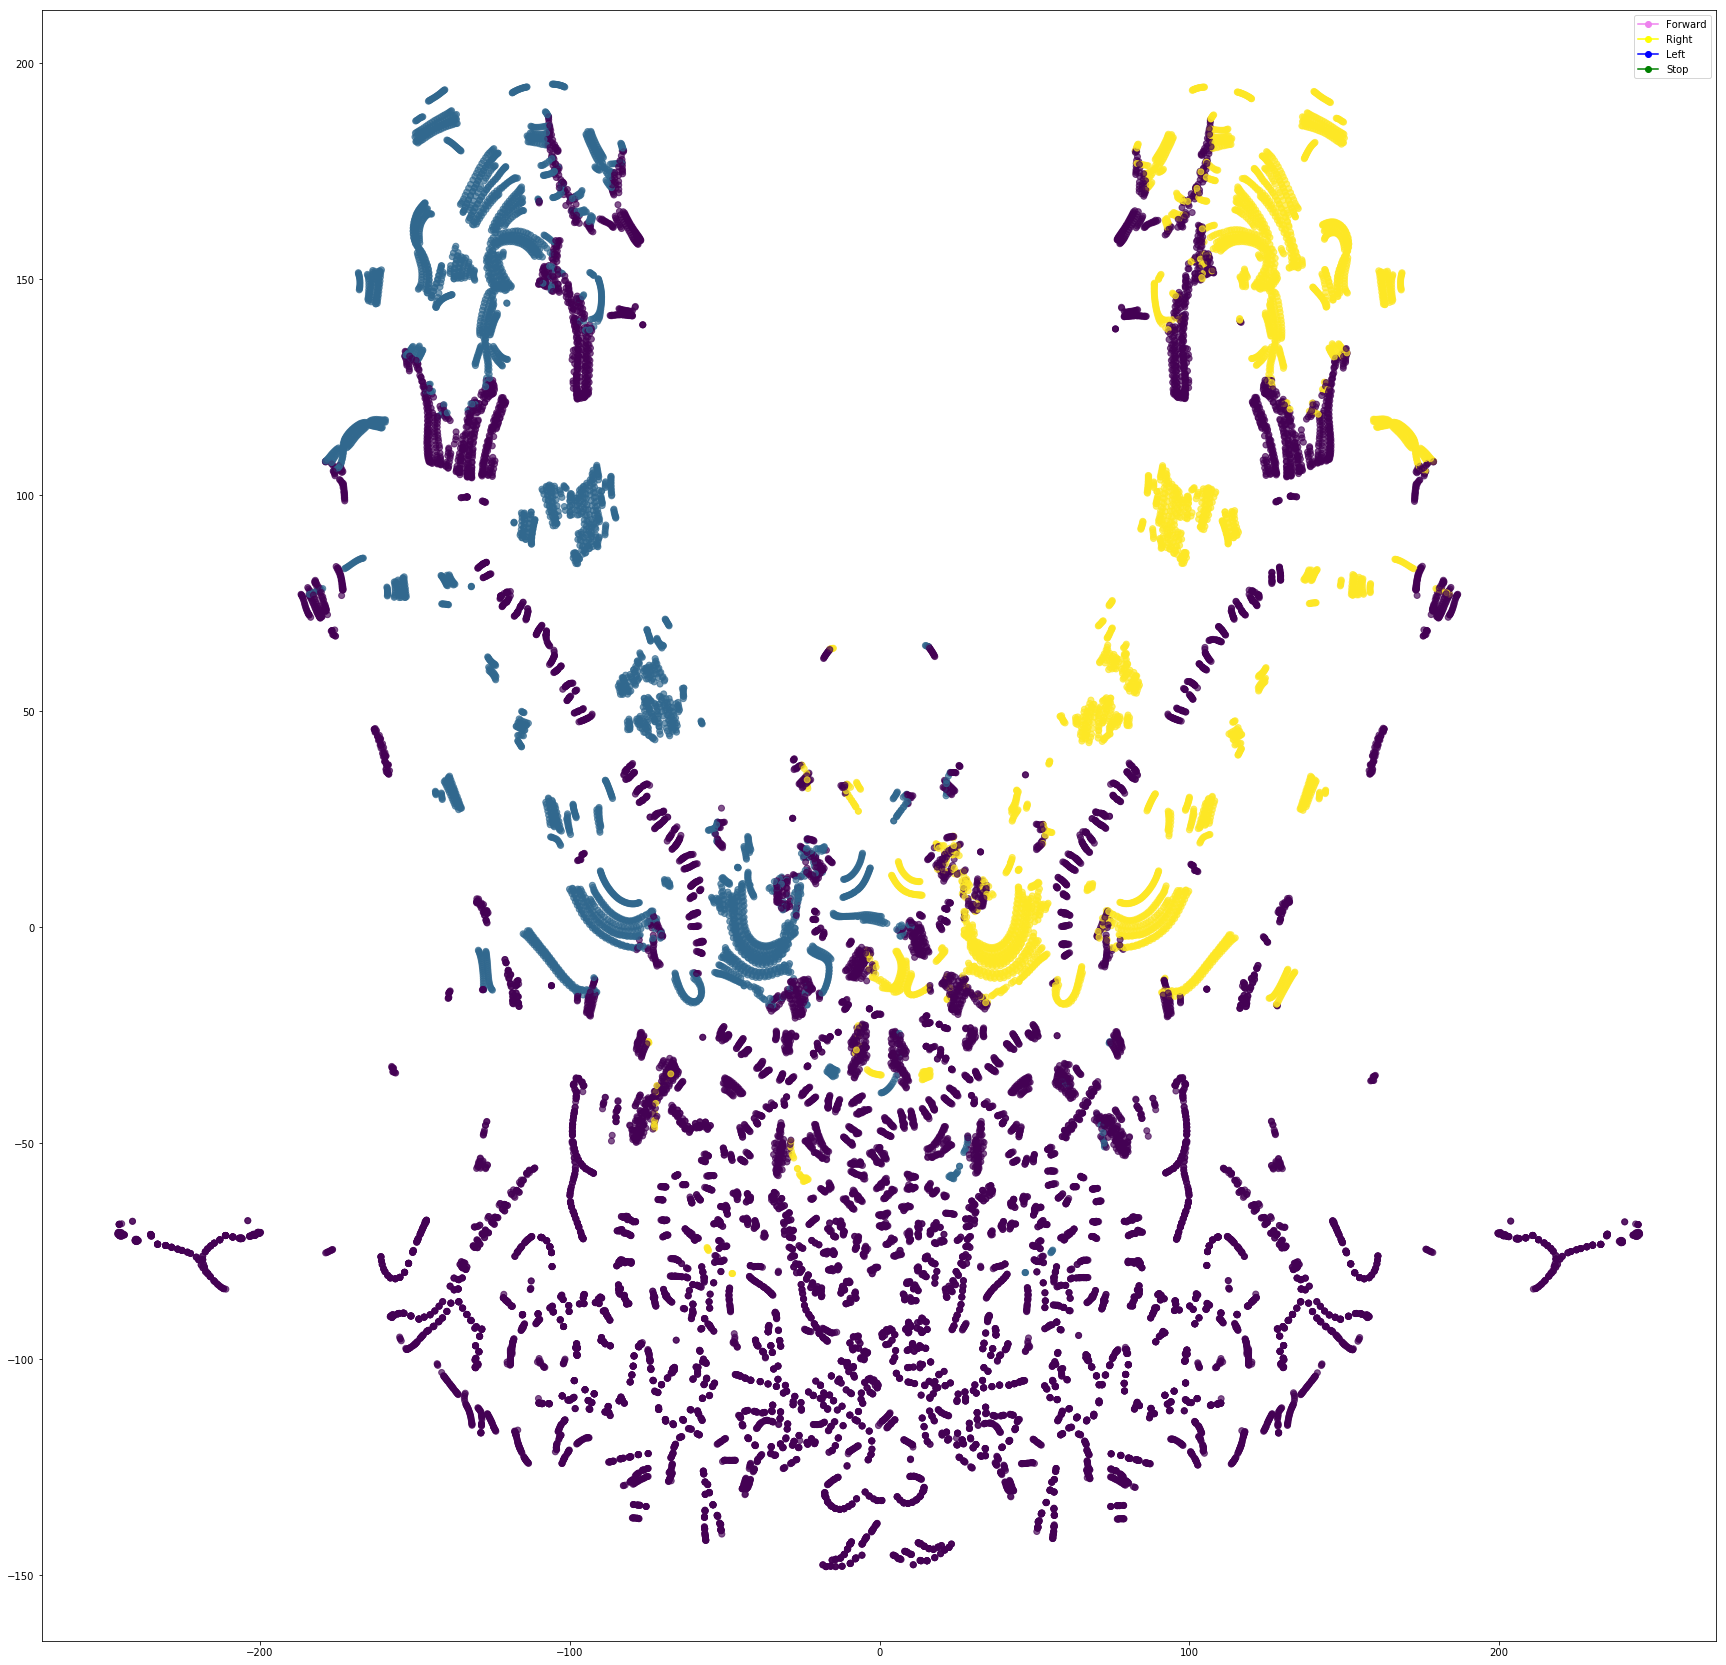

Wall time: 18min 33s


In [7]:
%%time
tsne = TSNE(n_components = 2, init = 'pca')
data_2d_tsne = tsne.fit_transform(X)

pylab.figure(figsize = (30, 30))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = y, alpha = 0.67)

pylab.legend((f, r, l, s),(movements),numpoints=1, loc=1)

pylab.show()

As you see at the picture the data are almost symmetric. This mean that there is no data content imbalence and the likelihood of inadequate behavior of the model was reduced. Even if the model is still inadequate, then it may caused by not enought completeness of data, not the imbalence of data content. 

# Underfitting is just enough

If you look at data visualizations carefully, you can find a lot of objects from class "Forward" in area of "Right" and "Left" clusters. The collecting lidar data in Unity, it's similar to the recording for the DVR, i.e. the data is a continuous stream of frames. The only difference is that for each frame you add a label, as character's current action. The "labels.csv" file look like as shown below:

<table>
    <tr>
        <th>№</th>
        <th>Image name</th>
        <th>Label</th>
    </tr>
    <tr>
        <td>1</td>
        <td>image_001</td>
        <td>forward</td>
    </tr>
    <tr>
        <td>2</td>
        <td>image_002</td>
        <td>forward</td>
    </tr>
    <tr>
        <td>3</td>
        <td>image_003</td>
        <td>forward</td>
    </tr>
    <tr>
        <td>******</td>
        <td>******</td>
        <td>forward<td>
    </tr>
    <tr>
        <td>108</td>
        <td>image_108</td>
        <td>forward</td>
    </tr>
    <tr>
        <td>109</td>
        <td>image_109</td>
        <td>forward</td>
    </tr>
    <tr>
        <td>110</td>
        <td>image_110</td>
        <td>right</td>
    </tr>
    <tr>
        <td>111</td>
        <td>image_111</td>
        <td>right</td>
    </tr>
    <tr>
        <td>******</td>
        <td>******</td>
        <td>right</td>
    </tr>
    <tr>
        <td>317</td>
        <td>image_317</td>
        <td>right</td>
    </tr>
    <tr>
        <td>318</td>
        <td>image_318</td>
        <td>right</td>
    </tr>
</table>

Because of data collects continuously, the two neighboring frames on "border" (images 109 and 110) can have similar content but different labels. For example two pictures with different labels are shown below:

<table>
    <tr>
        <th><h4>Label: "Forward"</h4></th>
        <th><h4>Label: "Right"</h4></th>
    </tr>
    <tr>
        <td><img src="images/example_label_forward.jpg", width=360, height=128></td>
        <td><img src="images/example_label_right.jpg", width=360, height=128></td>
    </tr>
</table>

The contents of this two images is identical to each other. If we gonna look at images, which 10 frames before and after that "border" we can find similar content:

<table>
    <tr>
        <th><h4>Label: "Forward" (10 frames before "border")</h4></th>
        <th><h4>Label: "Right" (10 frames after "border")</h4></th>
    </tr>
    <tr>
        <td><img src="images/example_10_frames_before.jpg", width=360, height=128></td>
        <td><img src="images/example_10_frames_after.jpg", width=360, height=128></td>
    </tr>
</table>

The same thing we see on "Forward-Left" case. So that on visualizations we meet a lot of "Forward" class objects on area of "Right" and "Left" clusters. The problem is that there is some uncertainty i.e. no fixed conditions by which you can find a "border". If you will train your algorithm with high evaluations on train/dev/test sets you can get inadequate model. Because algorithm try to find divising conditions/hyperplane which is doesn't exist. In case of this task our main goal is to train adequate model. So there is reason to underfit our model a little bit.
<h6><b><i>Now let's go to the next notebook to apply our ideas in practice!</i></b></h6>